In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import MultipleLocator
from obspy import UTCDateTime, read, Trace, Stream
from scipy.fftpack import fft,ifft
from scipy import signal
from scipy import fft

In [3]:
df = pd.read_csv('./download_lunar_data/第1次浅月震记录数据.csv', engine='python', dtype={'vehicleplatenumber': str, 'device_num': str})
df = pd.DataFrame(df)
# print(os.getcwd())
# print(df.columns)
# print(df.dtypes)
data_12 = df[(df[' ap_station'] == 12)]

In [117]:
data_12_time = (data_12.iloc[:,4])
len(data_12_time)

46076

In [122]:
stat_s = UTCDateTime(data_12_time.iloc[0])
stat_e = UTCDateTime(data_12_time.iloc[46075])

stat_all = stat_e - stat_s
stat_all

6959.914

In [126]:
data_time_deal = data_12_time.map(lambda x: str(x)[14:])
data_time_deal = data_time_deal.map(lambda x: str(x)[:-3])
data_time_deal

0        04:00.068
1        04:00.219
2        04:00.370
3        04:00.521
4        04:00.672
5        04:00.823
6        04:00.974
7        04:01.125
8        04:01.275
9        04:01.426
10       04:01.577
11       04:01.728
12       04:01.879
13       04:02.030
14       04:02.181
15       04:02.332
16       04:02.483
17       04:02.634
18       04:02.785
19       04:02.936
20       04:03.087
21       04:03.238
22       04:03.389
23       04:03.540
24       04:03.690
25       04:03.841
26       04:03.992
27       04:04.143
28       04:04.294
29       04:04.445
           ...    
46046    59:55.605
46047    59:55.756
46048    59:55.906
46049    59:56.057
46050    59:56.208
46051    59:56.359
46052    59:56.510
46053    59:56.661
46054    59:56.812
46055    59:56.963
46056    59:57.114
46057    59:57.265
46058    59:57.416
46059    59:57.567
46060    59:57.718
46061    59:57.869
46062    59:58.020
46063    59:58.171
46064    59:58.321
46065    59:58.472
46066    59:58.623
46067    59:

In [131]:
# 地震数据
data_12_quake = data_12.iloc[:,7]
data_12_quake = np.array(data_12_quake).astype(np.float32)
# dtime = data_12_x.astype('datetime64[ns]')
data_correction = np.where(data_12_quake < 800, data_12_quake, 511)
data_correction = np.where(data_correction > 0, data_correction, 511)
# 归0
data_correction = data_correction - np.float32(511.0)
data_correction

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [143]:
def demo_plot(t, u):
    ax = plt.gca() 
    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    plt.plot(t,u)
    plt.gca().margins(x=0)
    plt.gcf().canvas.draw()

    maxsize = 12
    m = 0.2
    N = len(data_time1)
    s = maxsize / plt.gcf().dpi * N + 2 * m
    margin = m / plt.gcf().get_size_inches()[0]
    plt.gcf().subplots_adjust(left=margin, right=1. - margin)
    plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

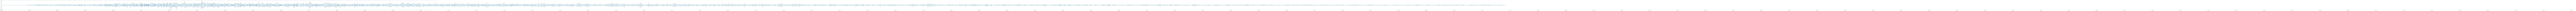

In [144]:
t = data_time_deal
u = data_correction
demo_plot(t,u)

In [129]:
# 取前5000个采样点
# 时间
data_12_x = data_12_time[0:5000]
stats = UTCDateTime(data_12_time.iloc[0])
state = UTCDateTime(data_12_time.iloc[4999])

stat = state - stats



In [91]:
# 地震数据
data_12_y = data_12.iloc[:,7]
data_12_y = np.array(data_12_y).astype(np.float32)
# dtime = data_12_x.astype('datetime64[ns]')
data_correction = np.where(data_12_y < 800, data_12_y, 511)
data_correction = np.where(data_correction > 0, data_correction, 511)
# 归0
data_correction = data_correction - np.float32(511.0)
# print(len(data_correction))

In [92]:
data_time1 = data_12_x.map(lambda x: str(x)[14:])

In [93]:
data_time2 = data_time1.map(lambda x: str(x)[:-3])

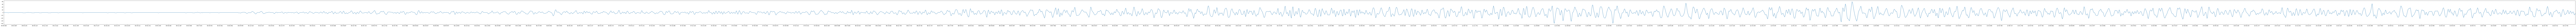

In [96]:
t = data_time2
u = data_1
demo_plot(t,u)

In [97]:
# 计算采样率
samples_rate =1.0 / (len(data_1) / stat)
samples_rate

0.150908

In [98]:
stat

754.54

In [99]:
len(data_1)

5000

In [112]:
b, a = signal.butter(10, 0.004, 'lowpass',output='ba', fs=samples_rate)
filtedData = signal.filtfilt(b, a, data_1)

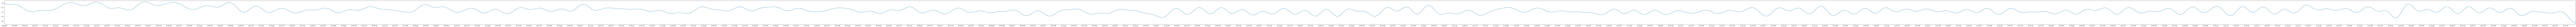

In [113]:
t = data_time2
u = filtedData
demo_plot(t,u)

In [114]:
#DFT
fft_y=np.abs(fft.fft(filtedData))
             
fft_y/=max(fft_y)
#frequency list

N = 5000
T = stat
fft_x=fft.fftfreq(N,T/N)

<function matplotlib.pyplot.show(*args, **kw)>

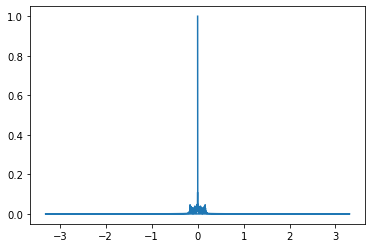

In [115]:
plt.plot(fft_x,fft_y)
plt.show

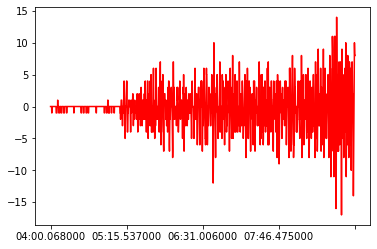

In [40]:
fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(500)) 
ax.plot(data_time1,data_1, 'r')
plt.show()

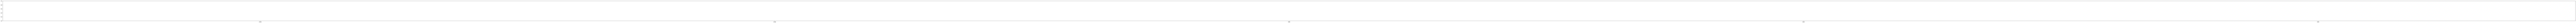

In [38]:

    plt.gca().margins(x=0)
    plt.gcf().canvas.draw()
#tl = plt.gca().get_xticklabels()
    maxsize = 15
    m = 0.2
    N = len(data_time1)
    s = maxsize / plt.gcf().dpi * N + 2 * m
    margin = m / plt.gcf().get_size_inches()[0]
    plt.gcf().subplots_adjust(left=margin, right=1. - margin)
    plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

In [4]:
# 计算采样率
samples_rate =1.0 / (len(data_1) / stat)

In [6]:
print(data_12_x.dtypes)

object


In [5]:
#print(data_12_x)

0.150908


In [7]:
data_12_x.shape

(5000,)

In [8]:
x_1 = data_12_x.values

In [9]:
x_1

array(['1971-04-17 07:04:00.068000', '1971-04-17 07:04:00.219000',
       '1971-04-17 07:04:00.370000', ..., '1971-04-17 07:16:34.306000',
       '1971-04-17 07:16:34.457000', '1971-04-17 07:16:34.608000'],
      dtype=object)

In [10]:
data_time = data_12_x.map(lambda x: str(x)[14:])

In [11]:
print(data_time)

0       04:00.068000
1       04:00.219000
2       04:00.370000
3       04:00.521000
4       04:00.672000
5       04:00.823000
6       04:00.974000
7       04:01.125000
8       04:01.275000
9       04:01.426000
10      04:01.577000
11      04:01.728000
12      04:01.879000
13      04:02.030000
14      04:02.181000
15      04:02.332000
16      04:02.483000
17      04:02.634000
18      04:02.785000
19      04:02.936000
20      04:03.087000
21      04:03.238000
22      04:03.389000
23      04:03.540000
24      04:03.690000
25      04:03.841000
26      04:03.992000
27      04:04.143000
28      04:04.294000
29      04:04.445000
            ...     
4970    16:30.231000
4971    16:30.382000
4972    16:30.533000
4973    16:30.684000
4974    16:30.835000
4975    16:30.986000
4976    16:31.137000
4977    16:31.288000
4978    16:31.439000
4979    16:31.590000
4980    16:31.740000
4981    16:31.891000
4982    16:32.042000
4983    16:32.193000
4984    16:32.344000
4985    16:32.495000
4986    16:32

ValueError: Image size of 75028x288 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 75028.8x288 with 1 Axes>

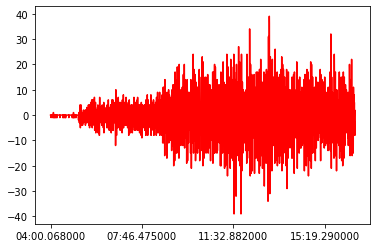

In [28]:
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
#tl = plt.gca().get_xticklabels()
maxsize = 15
m = 0.2
N = len(data_time)
s = maxsize / plt.gcf().dpi * N + 2 * m
margin = m / plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1. - margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1500)) 


ax.plot(data_time,data_1, 'r')
plt.show()

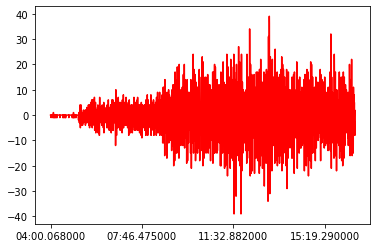

In [19]:
fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1500)) 


ax.plot(data_time,data_1, 'r')
plt.show()

In [ ]:
class FFt_pack():
    def__init__(self, _list[], N = 0):
        self.list = _list
        self.N = N
        self.total_m = 0
        self._reverse_list = []
        self.output = []
        self.W = []
        